In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_csv("emotions.csv")  # Adjust the path as needed

# Show basic info
print("Dataset Shape:", df.shape)
print("\nMissing Values:", df.isnull().sum().sum())



Dataset Shape: (2132, 2549)

Missing Values: 0


In [3]:
# Show class distribution
print("\nClass Distribution:")
print(df['label'].value_counts())




Class Distribution:
label
NEUTRAL     716
NEGATIVE    708
POSITIVE    708
Name: count, dtype: int64


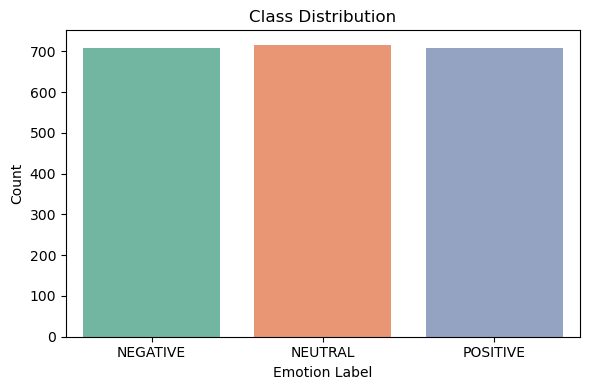


Sample Feature Stats:
        # mean_0_a     mean_1_a     mean_2_a     mean_3_a     mean_4_a  \
count  2132.000000  2132.000000  2132.000000  2132.000000  2132.000000   
mean     15.256914    27.012462  -104.975629    13.605898    24.150483   
std      15.284621     9.265141   206.271960    16.874676    14.187340   
min     -61.300000  -114.000000  -970.000000  -137.000000  -217.000000   
25%       6.577500    26.075000  -195.000000     4.857500    23.600000   
50%      14.100000    30.000000    14.950000    15.400000    25.200000   
75%      27.700000    31.400000    29.600000    26.500000    26.800000   
max     304.000000    42.300000   661.000000   206.000000   213.000000   

        mean_d_0_a   mean_d_1_a   mean_d_2_a   mean_d_3_a   mean_d_4_a  
count  2132.000000  2132.000000  2132.000000  2132.000000  2132.000000  
mean      0.025378     0.052282     0.301655     0.036793     0.083567  
std      17.981796     8.509174    68.098894    17.010031    18.935378  
min    -218.000000

In [4]:
# Plot class distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='label', palette='Set2')
plt.title("Class Distribution")
plt.xlabel("Emotion Label")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Show descriptive statistics for a sample of features
print("\nSample Feature Stats:")
print(df.iloc[:, :10].describe())

In [5]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

In [6]:
# Separate features and target
X = df.drop(columns=["label"])
y = df["label"]

# Apply Variance Threshold to remove features with variance < 0.01
selector = VarianceThreshold(threshold=0.01)
X_high_variance = selector.fit_transform(X)

# Get the names of selected features
selected_features = X.columns[selector.get_support()]

# Create new DataFrame with selected features
df_selected = pd.DataFrame(X_high_variance, columns=selected_features)
df_selected["label"] = y

# Show result
print(f"Selected Features: {len(selected_features)} out of {X.shape[1]}")
print("\nSample of selected features:")
print(df_selected[selected_features[:10]].describe())

Selected Features: 2548 out of 2548

Sample of selected features:
        # mean_0_a     mean_1_a     mean_2_a     mean_3_a     mean_4_a  \
count  2132.000000  2132.000000  2132.000000  2132.000000  2132.000000   
mean     15.256914    27.012462  -104.975629    13.605898    24.150483   
std      15.284621     9.265141   206.271960    16.874676    14.187340   
min     -61.300000  -114.000000  -970.000000  -137.000000  -217.000000   
25%       6.577500    26.075000  -195.000000     4.857500    23.600000   
50%      14.100000    30.000000    14.950000    15.400000    25.200000   
75%      27.700000    31.400000    29.600000    26.500000    26.800000   
max     304.000000    42.300000   661.000000   206.000000   213.000000   

        mean_d_0_a   mean_d_1_a   mean_d_2_a   mean_d_3_a   mean_d_4_a  
count  2132.000000  2132.000000  2132.000000  2132.000000  2132.000000  
mean      0.025378     0.052282     0.301655     0.036793     0.083567  
std      17.981796     8.509174    68.098894    

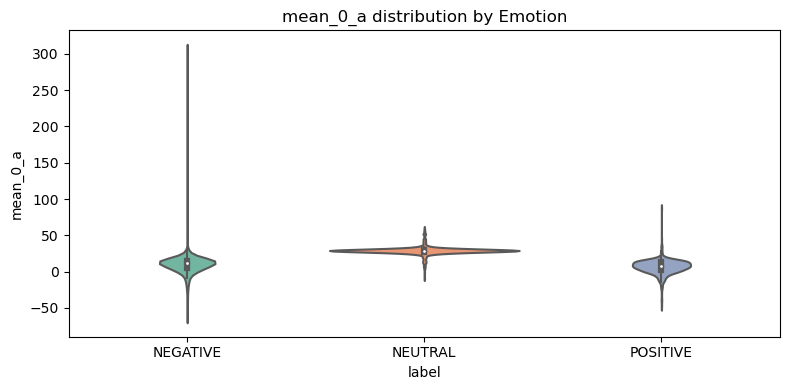

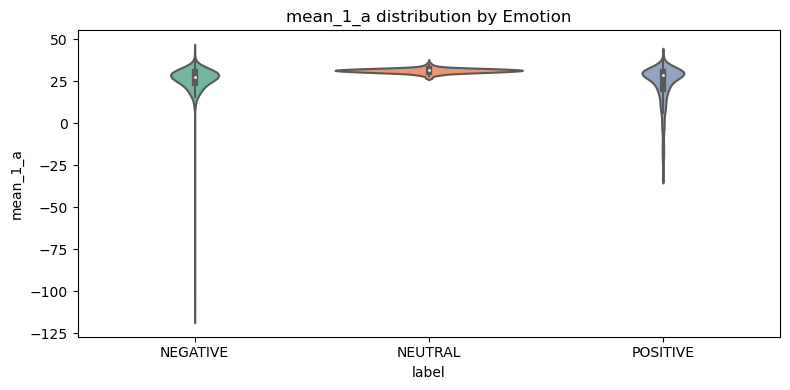

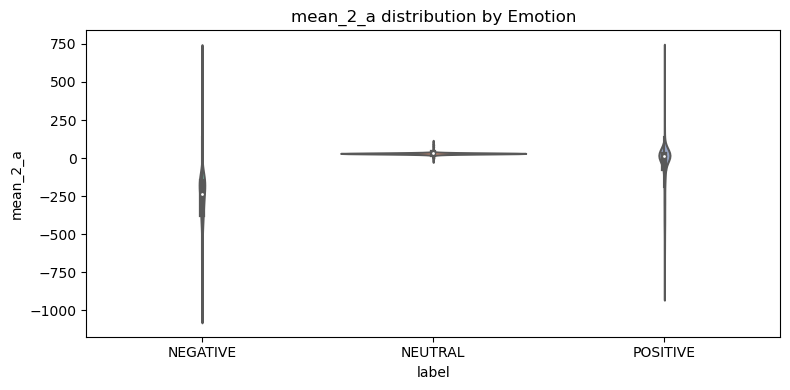

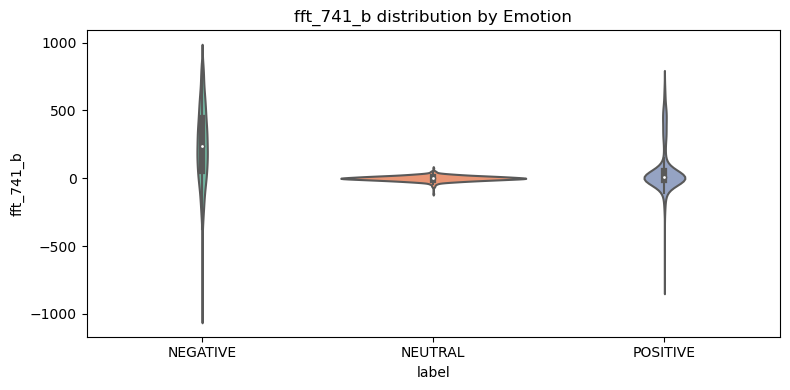

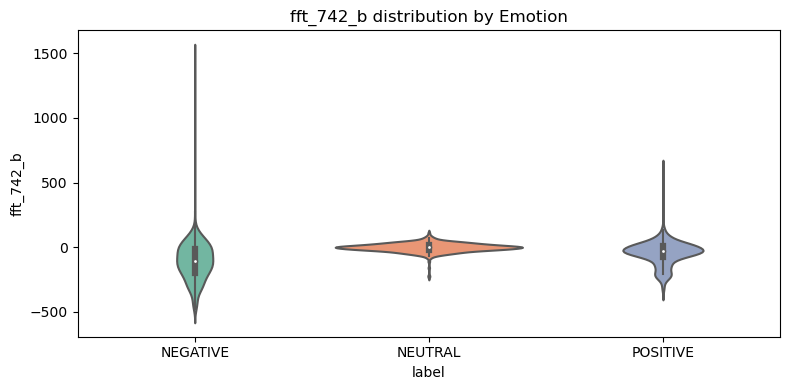

In [10]:
# Load dataset
df = pd.read_csv("emotions.csv")

# Rename '# mean_0_a' if needed
if '# mean_0_a' in df.columns:
    df = df.rename(columns={'# mean_0_a': 'mean_0_a'})

# Choose a few meaningful EEG features to visualize
features_to_plot = ['mean_0_a', 'mean_1_a', 'mean_2_a', 'fft_741_b', 'fft_742_b']

# Plot each feature per emotion class
for feature in features_to_plot:
    if feature in df.columns:
        plt.figure(figsize=(8, 4))
        sns.violinplot(x='label', y=feature, data=df, palette='Set2')
        plt.title(f"{feature} distribution by Emotion")
        plt.tight_layout()
        plt.show()


In [9]:
print(df_selected.columns.tolist())

['# mean_0_a', 'mean_1_a', 'mean_2_a', 'mean_3_a', 'mean_4_a', 'mean_d_0_a', 'mean_d_1_a', 'mean_d_2_a', 'mean_d_3_a', 'mean_d_4_a', 'mean_d_0_a2', 'mean_d_1_a2', 'mean_d_2_a2', 'mean_d_3_a2', 'mean_d_4_a2', 'mean_d_5_a', 'mean_d_6_a', 'mean_d_7_a', 'mean_d_8_a', 'mean_d_9_a', 'mean_d_10_a', 'mean_d_11_a', 'mean_d_12_a', 'mean_d_13_a', 'mean_d_14_a', 'mean_d_15_a', 'mean_d_16_a', 'mean_d_17_a', 'mean_d_18_a', 'mean_d_19_a', 'mean_d_20_a', 'mean_d_21_a', 'mean_d_22_a', 'mean_d_23_a', 'mean_d_24_a', 'mean_d_25_a', 'mean_d_26_a', 'mean_d_27_a', 'mean_d_28_a', 'mean_d_29_a', 'mean_d_30_a', 'mean_d_31_a', 'mean_d_32_a', 'mean_d_33_a', 'mean_d_34_a', 'mean_d_35_a', 'mean_d_36_a', 'mean_d_37_a', 'mean_d_38_a', 'mean_d_39_a', 'mean_d_40_a', 'mean_d_41_a', 'mean_d_42_a', 'mean_d_43_a', 'mean_d_44_a', 'mean_d_45_a', 'mean_d_46_a', 'mean_d_47_a', 'mean_d_48_a', 'mean_d_49_a', 'stddev_0_a', 'stddev_1_a', 'stddev_2_a', 'stddev_3_a', 'stddev_4_a', 'stddev_d_0_a', 'stddev_d_1_a', 'stddev_d_2_a', 'std